In [1]:
# Author: Gael Varoquaux <gael.varoquaux@normalesup.org>
# Copyright (c) 2008, Enthought, Inc.
# License: BSD Style.

from mayavi import mlab
import numpy as np
from scipy.special import sph_harm
import numpy as np

import quaternion
import spherical_functions as sf

/home/daniel/.virtualenvs/gaston/sandbox/local/lib/python3.7/site-packages/quaternion/numba_wrapper.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.utils', please update to use 'numba.core.utils' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.utils import IS_PY3
/home/daniel/.virtualenvs/gaston/sandbox/local/lib/python3.7/site-packages/quaternion/numba_wrapper.py:20: UserWarning: 

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Could not import from numba, which means that some
parts of this code may run MUCH more slowly.  You
may wish to install numba.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  warnings.warn(warning_text)


In [2]:
from IPython.display import HTML

In [3]:
# Create a sphere
r = 0.3
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0:pi:101j, 0:2 * pi:101j]

x = r * sin(phi) * cos(theta)
y = r * sin(phi) * sin(theta)
z = r * cos(phi)

In [4]:
#mlab.init_notebook()

In [5]:
m, n = 2, 2
r = 0.5

In [6]:
s = sph_harm(m, n, theta, phi).real
s[s < 0] *= 0.97
s /= s.max()

In [7]:
x = r * sin(phi) * cos(theta)
y = r * sin(phi) * sin(theta)
z = r * cos(phi)

In [8]:
a = np.cos(np.linspace(-0.5*np.pi, 1.5*np.pi, 250))

In [9]:
t = 0

In [10]:
n,m = 1,1
init_fig = mlab.figure(1,  bgcolor=(1, 1, 1), fgcolor=(0, 0, 0),  size=(300, 300))
s = sph_harm(m, n, theta, phi).real
mlab.clf()
p=1.5
t=40
mlab.mesh((p+a[t]*s) * x, (p+a[t]*s) * y, (p+a[t]*s) * z,
                  scalars=s, colormap='viridis')
t=100
mlab.mesh((p+a[t]*s) * x, (p+a[t]*s) * y, (p+a[t]*s) * z,
                  scalars=s, colormap='viridis')
mlab.view(45, 45, 2.6, focalpoint=(0,0,0))
init_fig

In [11]:
s = sph_harm(m, n, theta, phi).real
#s[s < 0] *= 0.97
s /= s.max()

this_fig = mlab.figure(1, bgcolor=(1, 1, 1), fgcolor=(0, 0, 0), size=(200, 200))
mlab.clf()
p=1.5
mlab.mesh((p+a[t]*s) * x, (p+a[t]*s) * y, (p+a[t]*s) * z,
              scalars=s, colormap='Greys')
#mlab.sync_camera(init_fig, this_fig)
#mlab.view(5, 45, 0.2, (-1.3, -2.9, 0.25))

In [12]:
mlab.init_notebook()

Notebook initialized with ipy backend.


In [88]:
def anim(t):
    
    phi, theta = np.mgrid[0.001:2*pi+0.001:101j, -pi/2-0.001:pi/2+0.001:101j]
    R_tp = quaternion.from_spherical_coords(phi, theta)
    w = np.array([sf.SWSH(R, l, (m, n)) for R in R_tp]).real
    s = w
    x = r * sin(phi) * cos(theta)
    y = r * sin(phi) * sin(theta)
    z = r * cos(phi)
    
    #print(s.max())
    s[s < 0] *= 0.97
    s /= s.max()
    
    this_fig = mlab.figure(1, bgcolor=(1, 1, 1), fgcolor=(0, 0, 0), size=(600, 600))
    mlab.clf()
    p=1.5
    mlab.mesh((p+a[t]*s) * x, (p+a[t]*s) * y, (p+a[t]*s) * z,
                  scalars=s*0, colormap='Reds')
    #mlab.sync_camera(init_fig, this_fig)
    mlab.view(45, 45, 4.6, focalpoint=(0,0,0))
    mlab.show()
    return ax.imshow(mlab.screenshot(mode='rgb', antialiased=True)),

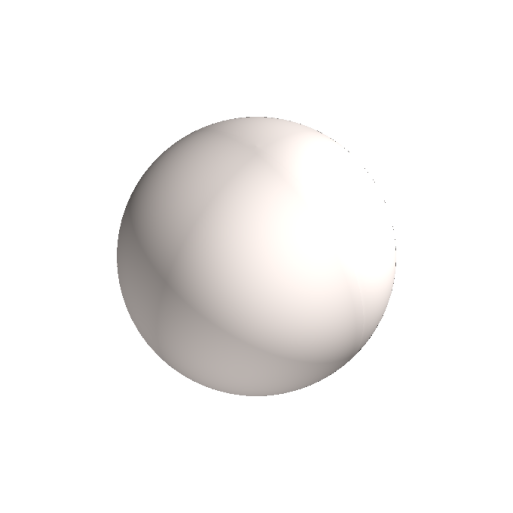

In [95]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

dpi = 300
width = 2 # 1920 / 300
height = 2# 1080 / dpi

fig, ax = plt.subplots(figsize=(width, height), dpi=dpi)

ax.grid(None)
fig.patch.set_visible(False)
ax.axis('off')

a = np.exp(-0.3*np.linspace(-0.5*np.pi, 5.5*np.pi, 1000)) * np.cos(np.linspace(-0.5*np.pi, 5.5*np.pi, 1000))
a[0] = 0
a[-1] = 0
l=-2
m, n = 2,2
mlab.view(90, 70, 4.6, focalpoint=(0,0,0))
#mlab.view(5, 45, 0.2, (-1.3, -2.9, 0.25))
ani = FuncAnimation(fig, anim, frames=np.arange(0,1000,50),  interval=100,
                   blit=False)

In [96]:
HTML(ani.to_html5_video())

In [60]:
l,m,n=2,2,-2

In [71]:
phi, theta = np.mgrid[-pi:pi:101j, -pi/2:pi/2:101j]
x = r * sin(phi) * cos(theta)
y = r * sin(phi) * sin(theta)
z = r * cos(phi)
R_tp = quaternion.from_spherical_coords(phi, theta) #-2*np.pi
#w = np.array([sf.Wigner_D_element(R, 3, 2, 1) for R in R_tp]).real
s = sph_harm(m, n, phi, theta).real
w = np.array([sf.SWSH(R, l, (m, n)) for R in R_tp])

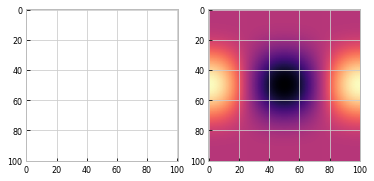

In [72]:
f, ax = plt.subplots(1,2)
ax[0].imshow(s.real)
ax[1].imshow(w.real)

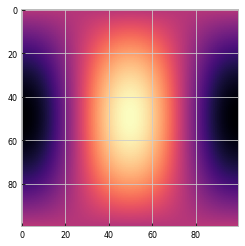